<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/Stockmarket_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

This data is about Stock market data. It contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [ ]:
weekly = pd.read_csv("https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/Weekly.csv")
weekly.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [ ]:
# Make categorical outputs numerical
weekly['Direction'] = weekly.Direction.map({'Up':1,'Down':0})
weekly['Direction'].value_counts()

1    605
0    484
Name: Direction, dtype: int64

In [ ]:
# Train data creates the model
# Test data tests the accuracy of the model
weekly_train = weekly[weekly['Year']<2005]
weekly_test = weekly[weekly['Year']>=2005]

In [ ]:
print('train size: {0}  test size {1}'.format(weekly_train.shape[0],weekly_test.shape[0]))

train size: 776  test size 313


In [ ]:
# Use Direction as the response and the five lag variables plus Volume as predictors
X_train = weekly_train[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_train = weekly_train[['Direction']]
X_test = weekly_test[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_test = weekly_test[['Direction']]

In [ ]:
# Logistic Regression
# Fit the model on the train data (scikit-learn estimation)
clf = LogisticRegression()
clf.fit(X_train,y_train.values.ravel())
print(clf)
print('classes: ',clf.classes_) 
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression()
classes:  [0 1]
coefficients:  [[-0.03377348  0.04428604 -0.02218832 -0.04019038 -0.06056397 -0.17677777]]
intercept : [0.3780422]


In [ ]:
# Variable to predict slk model using X_test perdictors
clf_pred = clf.predict(X_test)

# Find the training and test set score
print("Training accuracy score: {:.3f}".format(clf.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(clf.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, clf_pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, clf_pred)) 

Training accuracy score: 0.559
Test accuracy score: 0.473

Confusion table:
 True         0    1
Predicted          
0          113  137
1           28   35

               precision    recall  f1-score   support

           0       0.45      0.80      0.58       141
           1       0.56      0.20      0.30       172

    accuracy                           0.47       313
   macro avg       0.50      0.50      0.44       313
weighted avg       0.51      0.47      0.42       313



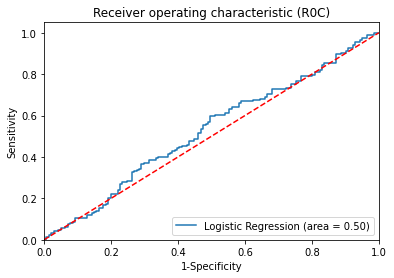

In [ ]:
# ROC curve and AUC
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic (R0C)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# LDA

In [ ]:
# Linear Discriminant Analysis
# Fit the model on the train data using LDA
lda = LinearDiscriminantAnalysis()
lda_pred = lda.fit(X_train, y_train).predict(X_test)

print(lda.means_)

# Find the accuracy of the test predictions vs the true classes
print("Training accuracy score: {:.3f}".format(lda.score(X_train,y_train)))
print("Test accuracy score: {:.3f}".format(lda.score(X_test,y_test)))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, lda_pred).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, lda_pred))

[[0.27440525 0.05883965 0.24726531 0.2553586  0.32569679 0.71228166]
 [0.12342494 0.29473441 0.13517783 0.12885219 0.06342494 0.67443599]]
Training accuracy score: 0.559
Test accuracy score: 0.476

Confusion table:
 True         0    1
Predicted          
0          114  137
1           27   35

               precision    recall  f1-score   support

           0       0.45      0.81      0.58       141
           1       0.56      0.20      0.30       172

    accuracy                           0.48       313
   macro avg       0.51      0.51      0.44       313
weighted avg       0.51      0.48      0.43       313



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


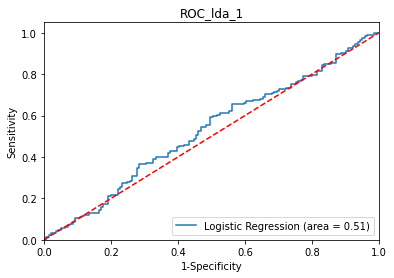

In [ ]:
# LDA - ROC curve and AUC
lda_roc_auc_1 = roc_auc_score(y_test, lda.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lda_roc_auc_1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC_lda_1')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()